# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales
- Redes neuronales recurrentes

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
colab_path_drive = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/'

## Redes recurrentes: Series de tiempo e identificación de sistemas

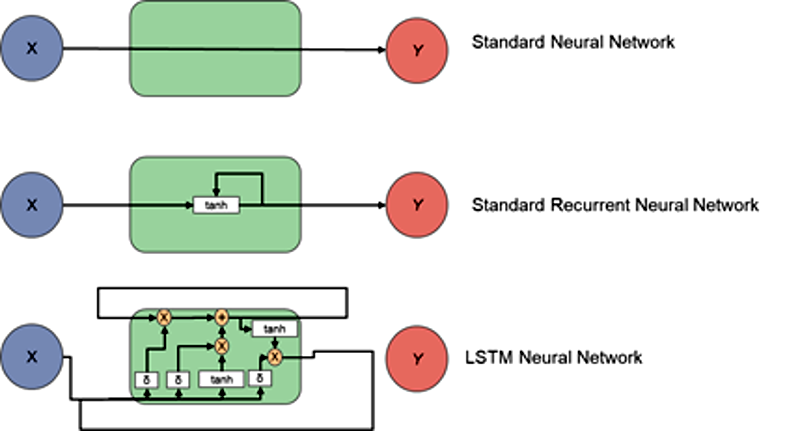

In [4]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig4.png')

### Long Short-Term Memory (LSTM)

La LSTM es una arquitectura de red neuronal artificial recurrente (RNN) utilizada en el aprendizaje profundo. No sólo puede procesar puntos de datos individuales (como imágenes), sino también secuencias enteras de datos (como voz o vídeo). Por ejemplo, LSTM es aplicable a tareas como el reconocimiento de escritura a mano o el reconocimiento de voz no segmentado y conectado.

La LSTM tiene la capacidad de eliminar o añadir información al estado de la célula, cuidadosamente regulada por estructuras llamadas gates. Las gates son una forma opcional de dejar pasar la información. Se componen de una capa de red neural sigmoide y una operación de multiplicación puntual.

Existen varias arquitecturas de unidades LSTM. Una arquitectura común se compone de una célula (la parte de memoria de la unidad LSTM) y tres *reguladores* (las gates), del flujo de información dentro de la unidad LSTM: una **gate de entrada**, una **gate de salida** y una **gate de olvido**. Algunas variaciones de la unidad LSTM no tienen una o más de estas gates o tal vez tengan otras gates.

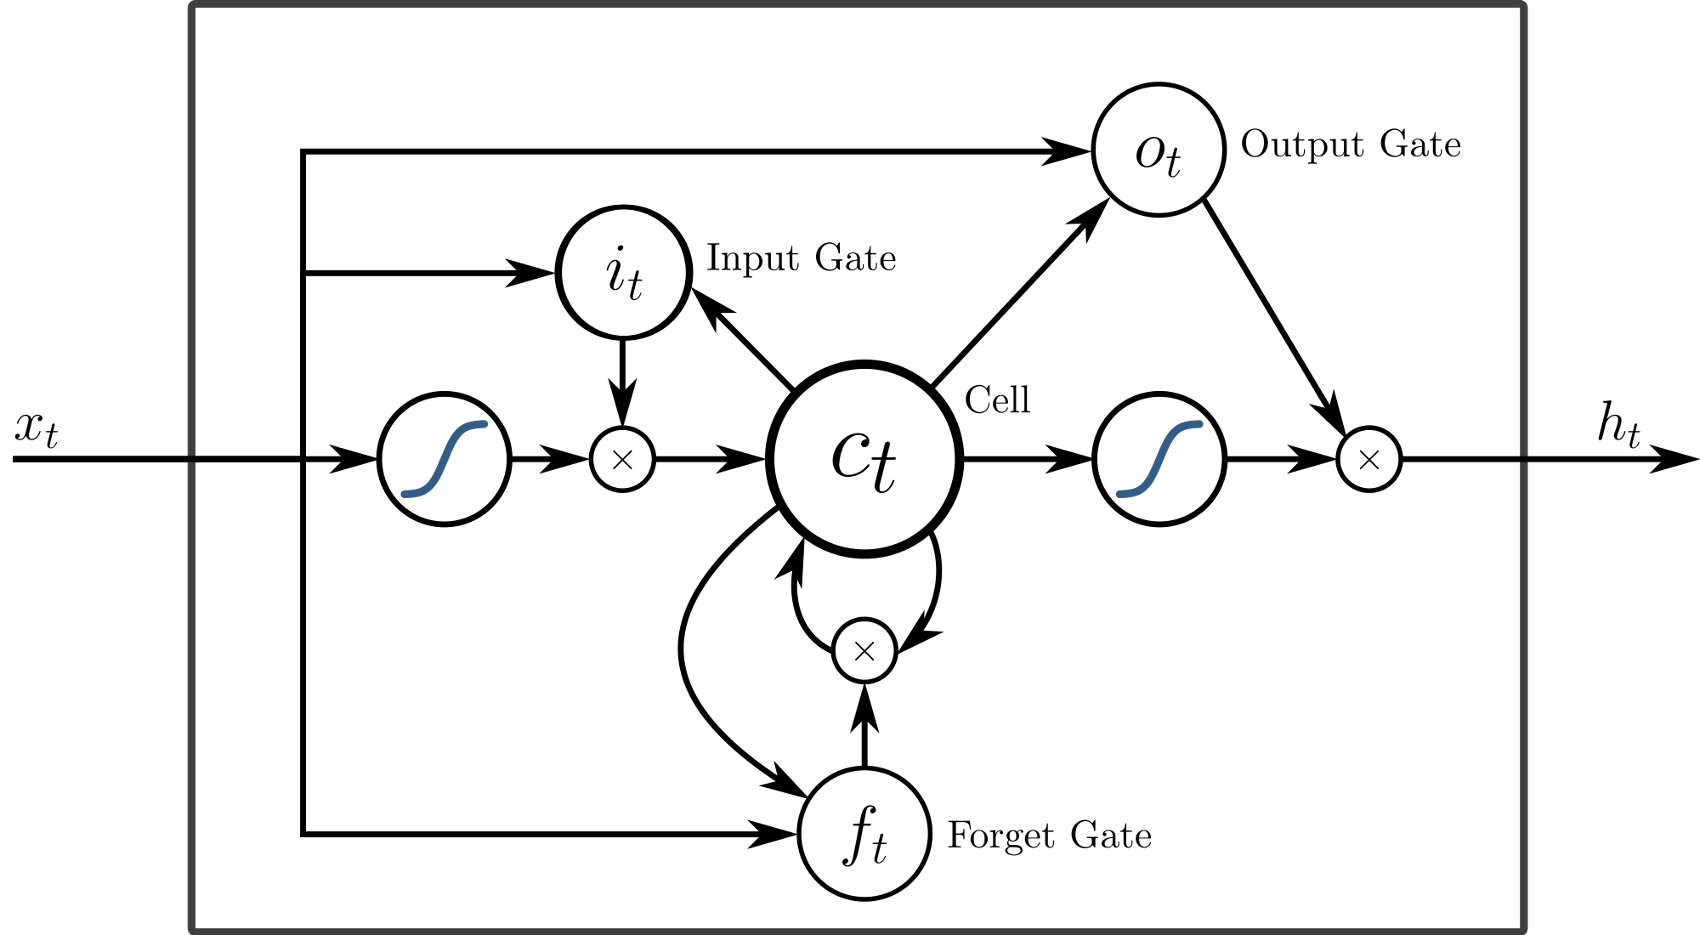

In [ ]:
Image(filename=valid_path + 'din_fig5.png')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return func(*args, **kwargs)


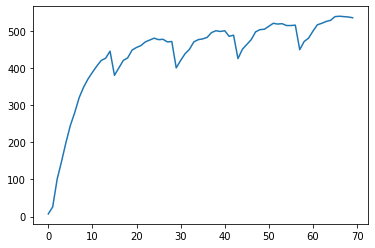

In [5]:
import pandas
import matplotlib.pyplot as plt

#dataset = pandas.read_csv('carboniz-temp.csv', usecols=[1], engine='python', skipfooter=3) # My HDD
dataset = pandas.read_csv(colab_path_drive + 'carboniz-temp.csv', usecols=[1], engine='python', skipfooter=3)
dataset2 = pandas.read_csv(colab_path_drive + 'carboniz-temp.csv', usecols=[2], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

49 21
Epoch 1/100
47/47 - 2s - loss: 0.5072 - 2s/epoch - 39ms/step
Epoch 2/100
47/47 - 0s - loss: 0.3287 - 77ms/epoch - 2ms/step
Epoch 3/100
47/47 - 0s - loss: 0.1813 - 85ms/epoch - 2ms/step
Epoch 4/100
47/47 - 0s - loss: 0.0784 - 117ms/epoch - 2ms/step
Epoch 5/100
47/47 - 0s - loss: 0.0292 - 80ms/epoch - 2ms/step
Epoch 6/100
47/47 - 0s - loss: 0.0137 - 81ms/epoch - 2ms/step
Epoch 7/100
47/47 - 0s - loss: 0.0110 - 77ms/epoch - 2ms/step
Epoch 8/100
47/47 - 0s - loss: 0.0105 - 76ms/epoch - 2ms/step
Epoch 9/100
47/47 - 0s - loss: 0.0103 - 89ms/epoch - 2ms/step
Epoch 10/100
47/47 - 0s - loss: 0.0099 - 86ms/epoch - 2ms/step
Epoch 11/100
47/47 - 0s - loss: 0.0095 - 88ms/epoch - 2ms/step
Epoch 12/100
47/47 - 0s - loss: 0.0090 - 88ms/epoch - 2ms/step
Epoch 13/100
47/47 - 0s - loss: 0.0088 - 80ms/epoch - 2ms/step
Epoch 14/100
47/47 - 0s - loss: 0.0084 - 85ms/epoch - 2ms/step
Epoch 15/100
47/47 - 0s - loss: 0.0080 - 86ms/epoch - 2ms/step
Epoch 16/100
47/47 - 0s - loss: 0.0077 - 75ms/epoch - 2ms/

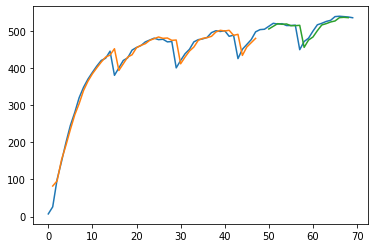

In [6]:
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Fija la semilla aleatoria
numpy.random.seed(7)

# Carga el dataset
#dataframe = pandas.read_csv('carboniz-temp.csv', usecols=[1], engine='python', skipfooter=3) # My HDD
dataframe = pandas.read_csv(colab_path_drive + 'carboniz-temp.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normaliza el dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Separación en grupos de entrenamiento y de prueba
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# Convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# Reshape en X=t y Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape entrada en [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Crear y adaptar la red LSTM
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Efectúa predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invertir las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcular el error cuadrático medio de la raíz
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Desplaza train predictions para grafica
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Desplaza test predictions para grafica
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Grafica baseline y predicciones
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Taller: Identificación de sistemas

Considere el péndulo de la figura:

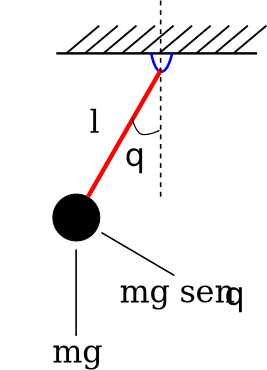

In [7]:
from IPython.display import SVG
SVG(valid_path + 'din_fig6.svg')

Este sistema se puede modelar por medio de las siguientes ecuaciones diferenciales:

$$\begin{array}{c}
\frac{dx_{1}}{dt}=x_{2}\\
\frac{dx_{2}}{dt}=-9.8\,sen\,x_{1}-0.5\,x_{2}+0.5\,\mu\\
y=x_{1}
\end{array}
$$

donde $x_1$ = $\theta$, $x_2$ = $d\theta /dt$, $\mu$ es la entrada de la planta y $y$ es la salida.

1. Simule y grafique el plano de fase del péndulo autónomo ($\mu$ = 0) desde la condición inicial $x_1 (0)$ = $x_2 (0)$ = 0.8 durante 20 s (región de interés: $x_1$, $x_2$ $\in\:\left[-1,\,1\right]$).
2. Tome al menos 150 datos de la curva simulada para entrenar una red LSTM. Se deben tomar 150 datos para $x_1$ y $x_2$ respecto al tiempo a intervalos constante, consecutivos y continuos. La primera columna corresponde al tiempo, la segunda columna corresponde a $x_1$ y la tercera columna corresponderá a $x_2$. En el código `usecols=[1]` hace referencia a la columna 2, genere una línea nueva con `usecols=[2]` para la tercera columna.
3. Utilice el 65% de los datos para entrenar el modelo LSTM para $x_1$ (`usecols[1]`), y el resto de los datos para verificar su funcionamiento. Haga lo mismo despues para $x_2$ (en total dos modelos).
4. Grafique las curvas de datos iniciales, de entrenamiento y de prueba para $x_1$ y para $x_2$ (una gráfica para $x_1$ y una gráfica para $x_2$). Luego genere con los datos de entrenamiento y de prueba la gráfica de $x_1$ vs $x_2$.

### Solución

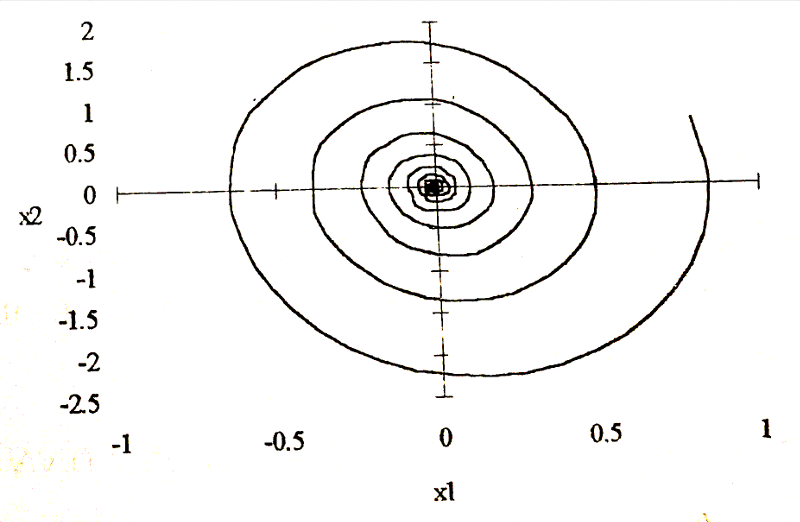

In [ ]:
Image(filename=valid_path + 'din_fig7.png')

In [ ]:
trainX

array([[[0.        ]],

       [[0.03571428]],

       [[0.17481203]],

       [[0.2650376 ]],

       [[0.36090225]],

       [[0.4473684 ]],

       [[0.5131579 ]],

       [[0.5883459 ]],

       [[0.64097744]],

       [[0.68233085]],

       [[0.7161654 ]],

       [[0.7481203 ]],

       [[0.7763158 ]],

       [[0.787594  ]],

       [[0.8233083 ]],

       [[0.7011278 ]],

       [[0.7387218 ]],

       [[0.7763158 ]],

       [[0.7894737 ]],

       [[0.82894737]],

       [[0.84210527]],

       [[0.8515038 ]],

       [[0.87030077]],

       [[0.8796993 ]],

       [[0.88909775]],

       [[0.881579  ]],

       [[0.8834587 ]],

       [[0.87030077]],

       [[0.87218046]],

       [[0.7387218 ]],

       [[0.7763158 ]],

       [[0.8101504 ]],

       [[0.83270675]],

       [[0.87030077]],

       [[0.881579  ]],

       [[0.88533837]],

       [[0.89285713]],

       [[0.91729325]],

       [[0.9266918 ]],

       [[0.9229323 ]],

       [[0.9266918 ]],

       [[0.89849